In [0]:
import keras
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
 cd "/content/drive/My Drive"

/content/drive/My Drive


In [5]:
cd Colab\ Notebooks


/content/drive/My Drive/Colab Notebooks


In [0]:
data=np.load('data.npz')

In [0]:
labels=data['labels']

In [8]:
image_features=data['image_features']
text_features=data['text_features']
print(image_features.shape)
print(text_features.shape)
total_features=np.hstack((image_features,text_features))
print(total_features.shape)

(560, 16384)
(560, 5580)
(560, 21964)


In [9]:
#Image Features only
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

 
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(4000, input_dim=2048*8, activation='relu'))
    model.add(Dense(1250,activation='relu'))
    model.add(Dense(750,activation='relu'))
    model.add(Dense(250,activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=3, batch_size=5, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator,image_features, labels, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4000)              65540000  
_________________________________________________________________
dense_2 (Dense)              (None, 1250)              5001250   
_________________________________________________________________
dense_3 (Dense)              (None, 750)               938250    
_________________________________________________________________
dense_4 (Dense)              (None, 250)               187750    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2510      
Total params: 71,669,760
Trainable params: 71,669,760
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/

KeyboardInterrupt: ignored

In [23]:
#Text Features only
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

 
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(2500, input_dim=5580, activation='relu'))
    model.add(Dense(1250,activation='relu'))
    model.add(Dense(750,activation='relu'))
    model.add(Dense(250,activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=3, batch_size=5, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator,text_features, labels, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 2500)              13952500  
_________________________________________________________________
dense_57 (Dense)             (None, 1250)              3126250   
_________________________________________________________________
dense_58 (Dense)             (None, 750)               938250    
_________________________________________________________________
dense_59 (Dense)             (None, 250)               187750    
_________________________________________________________________
dense_60 (Dense)             (None, 10)                2510      
Total params: 18,207,260
Trainable params: 18,207,260
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
504/504 [==============================] - 21s 41ms/step - loss: 1.8989 - acc: 0.3810
Epoch 2/3
5

In [11]:
#Text+Image Features 
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

 
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(4250, input_dim=(5580+2048*8),activation='relu'))
    model.add(Dense(2250,activation='relu'))
    model.add(Dense(1250,activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=3, batch_size=5, verbose=1)
kfold = KFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator,total_features, labels, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 4250)              93351250  
_________________________________________________________________
dense_36 (Dense)             (None, 2250)              9564750   
_________________________________________________________________
dense_37 (Dense)             (None, 1250)              2813750   
_________________________________________________________________
dense_38 (Dense)             (None, 10)                12510     
Total params: 105,742,260
Trainable params: 105,742,260
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
373/373 [==============================] - 73s 196ms/step - loss: 9.1048 - acc: 0.4772
Epoch 2/3
373/373 [==============================] - 70s 187ms/step - loss: 9.1610 - acc: 0.4853
Epoch 3/3
187/187 [========================

In [0]:
import numpy as np
from sklearn.manifold import TSNE

In [0]:

tsne = TSNE(n_components=2, random_state=0)

In [0]:
Image_2d = tsne.fit_transform(image_features)

In [0]:
Text_2d=tsne.fit_transform(text_features)

In [19]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(labels, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

(560, 2)


In [0]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = total_features
y = labels_max

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [0]:
X_2d = tsne.fit_transform(X)

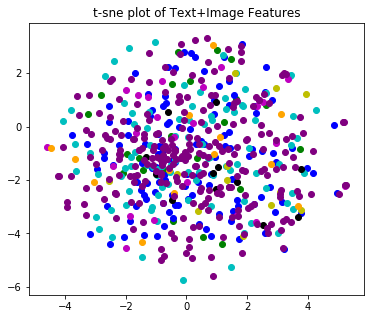

In [63]:
target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors,digits.target_names):
  plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=labels)
# plt.legend()

plt.title('t-sne plot of Text+Image Features')
plt.show()

In [32]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [0]:
labels_names=['Coffee Shop','Shop','Restaurent','Bank','Subway','Playfield','Theater','Bar','Hotel','Empty']

In [44]:
y = digits.target[:500]
print(X.shape,y.shape)

(560, 16384) (500,)


In [0]:
labels_max=np.zeros((560))
for i in range(560):
  labels_max[i]=np.argmax(labels[i,:])
  

In [47]:
np.unique(labels_max)

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])